In [3]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd
from matplotlib import rc  ### 이 줄과
# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
import numpy as np

import module
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# 모든 행 출력 설정
pd.set_option('display.max_rows', None)


rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


In [4]:
df = module.preprocess.file_load.load_current_version()

In [5]:
df.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [6]:
# 주변정보 = module.preprocess.file_load.load_주변정보()

In [7]:
module.preprocess.아파트_unique_key_add(df)

In [8]:
df정보 = module.preprocess.아파트주변정보(df)

In [9]:
df정보.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       ...
       '여수신 금리차', 'is_test', '아파트_unique_key', '편의점', '학원', '학교', '공공기관', '병원',
       '음식점', '어린이집, 유치원'],
      dtype='object', length=103)

In [10]:
dt_train = df정보.query('is_test == 0')

In [11]:
module.preprocess.날짜포맷_add(dt_train)

In [12]:
dt_train.head(1)

,index,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,금리_단기1년전차이,nearest_subway_distance,nearest_bus_distance,1차역세권,2차역세권,1차버스정류장,경과연도,경과구분,평수,층_그룹,평수_그룹,시,구,동,아파트ID,아파트ID거리,nearest_park_distance,가까운공원이름,가까운공원ID,공원갯수,공원총면적,공원생활권점수,산책로갯수,산책로총길이,산책생활권점수,생태문화길갯수,생태문화길총길이,생태문화생활권점수,한강지천길갯수,한강지천길총길이,한강지천생활권점수,숲세권종합점수,숲세권등급,한강거리,지가지수,아파트전세_전기대비증감률,실업률,민간소비,소비자심리지수,경제심리지수,여수신 금리차,is_test,아파트_unique_key,편의점,학원,학교,공공기관,병원,음식점,"어린이집, 유치원",계약연도,계약월,계약년월일
0,0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,08,3,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0.25,1020,68,0,0,1,30,30년_경과,24,10미만,20이상-30미만,서울특별시,강남구,개포동,A10023565,0.0,536.661181,개포목련,P02593,4,20646.0,15,0,0.0,0,1,6.02,59,0,0.0,0,16.447218,4,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987,4,14,2,0,5,18,7,2017,12,20171208


In [14]:
up2018 = dt_train[dt_train['계약연도'] >= '2018']

In [31]:
up2018['병원&학원'] = up2018['병원'] + up2018['학원']

In [42]:
columns = ['편의점', '학원', '학교', '공공기관', '병원', '음식점' , '어린이집, 유치원', 'target'] # ,'병원&학원'
분포  = up2018[columns]

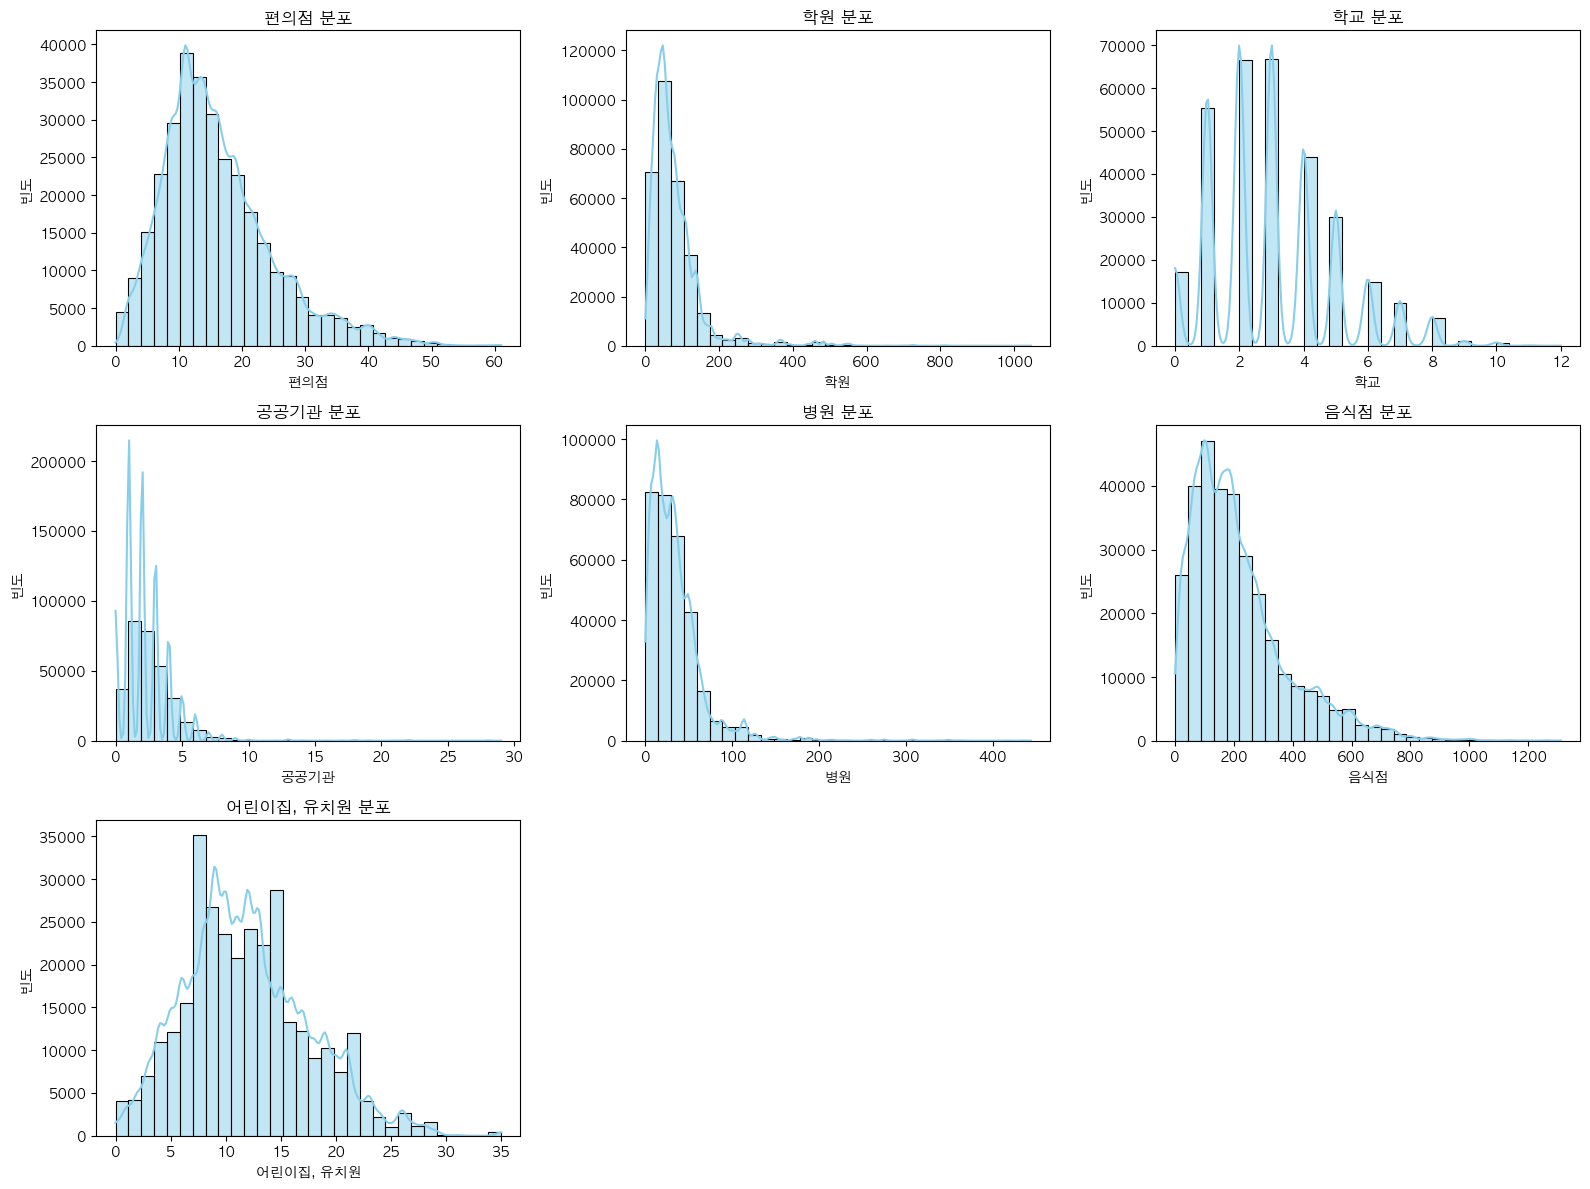

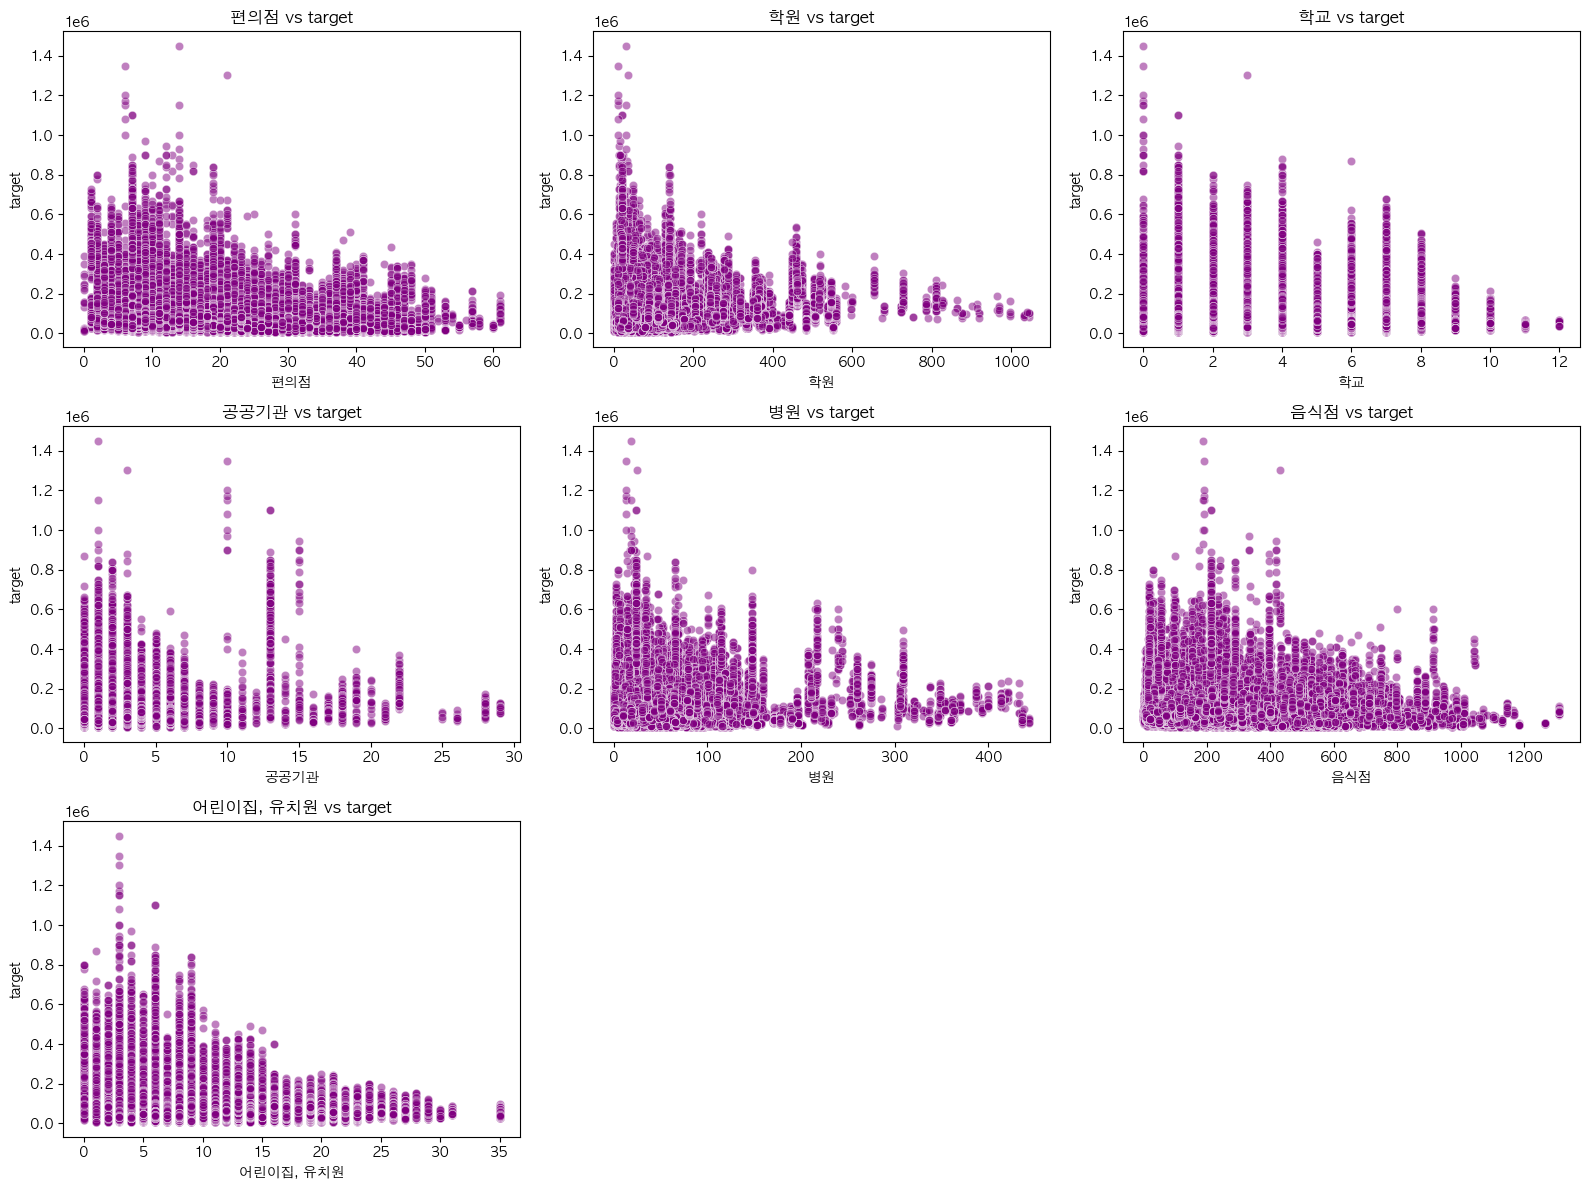

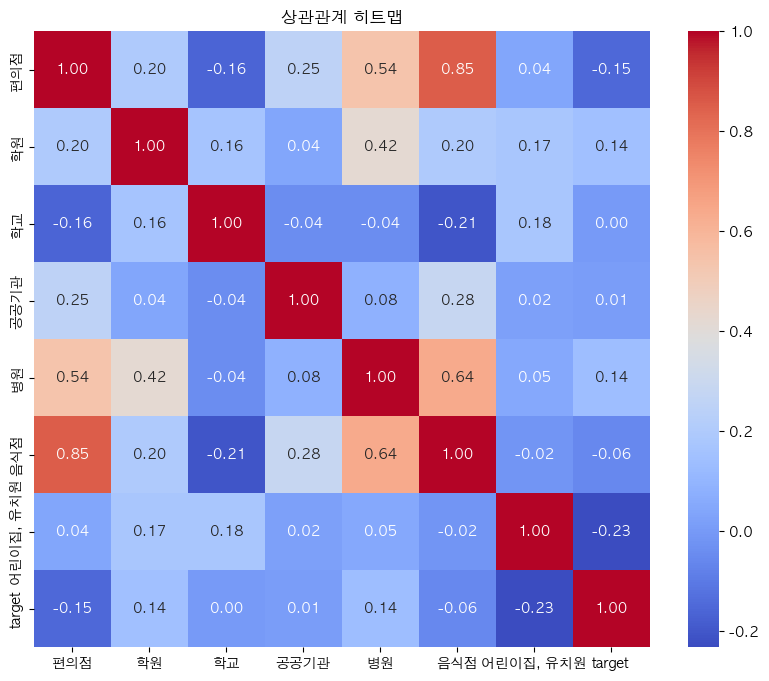

In [43]:
# 분석에 사용할 변수
data = 분포

# 1. 각 변수의 분포 확인
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns[:-1]):  # 'target' 제외
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')

plt.tight_layout()
plt.show()

# 2. 변수와 target의 관계 확인 (산점도)
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=data[col], y=data['target'], alpha=0.5, color='purple')
    plt.title(f'{col} vs target')
    plt.xlabel(col)
    plt.ylabel('target')

plt.tight_layout()
plt.show()

# 3. 상관관계 히트맵
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('상관관계 히트맵')
plt.show()

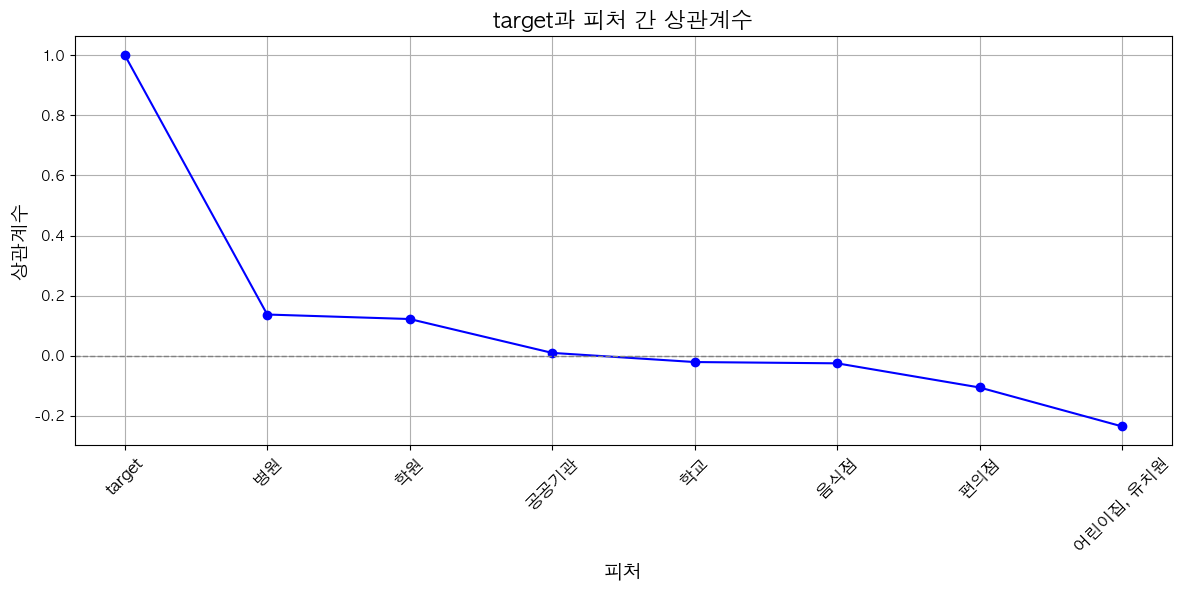

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 상관계수 계산
corr_matrix = data.corr()
target_corr = corr_matrix['target'].sort_values(ascending=False)  # target과의 상관계수 정렬

# 2. 상관계수 선그래프
plt.figure(figsize=(12, 6))
plt.plot(target_corr.index, target_corr.values, marker='o', linestyle='-', color='b')
plt.title('target과 피처 간 상관계수', fontsize=16)
plt.xlabel('피처', fontsize=14)
plt.ylabel('상관계수', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # 기준선 (상관계수 0)
plt.grid(True)
plt.tight_layout()
plt.show()


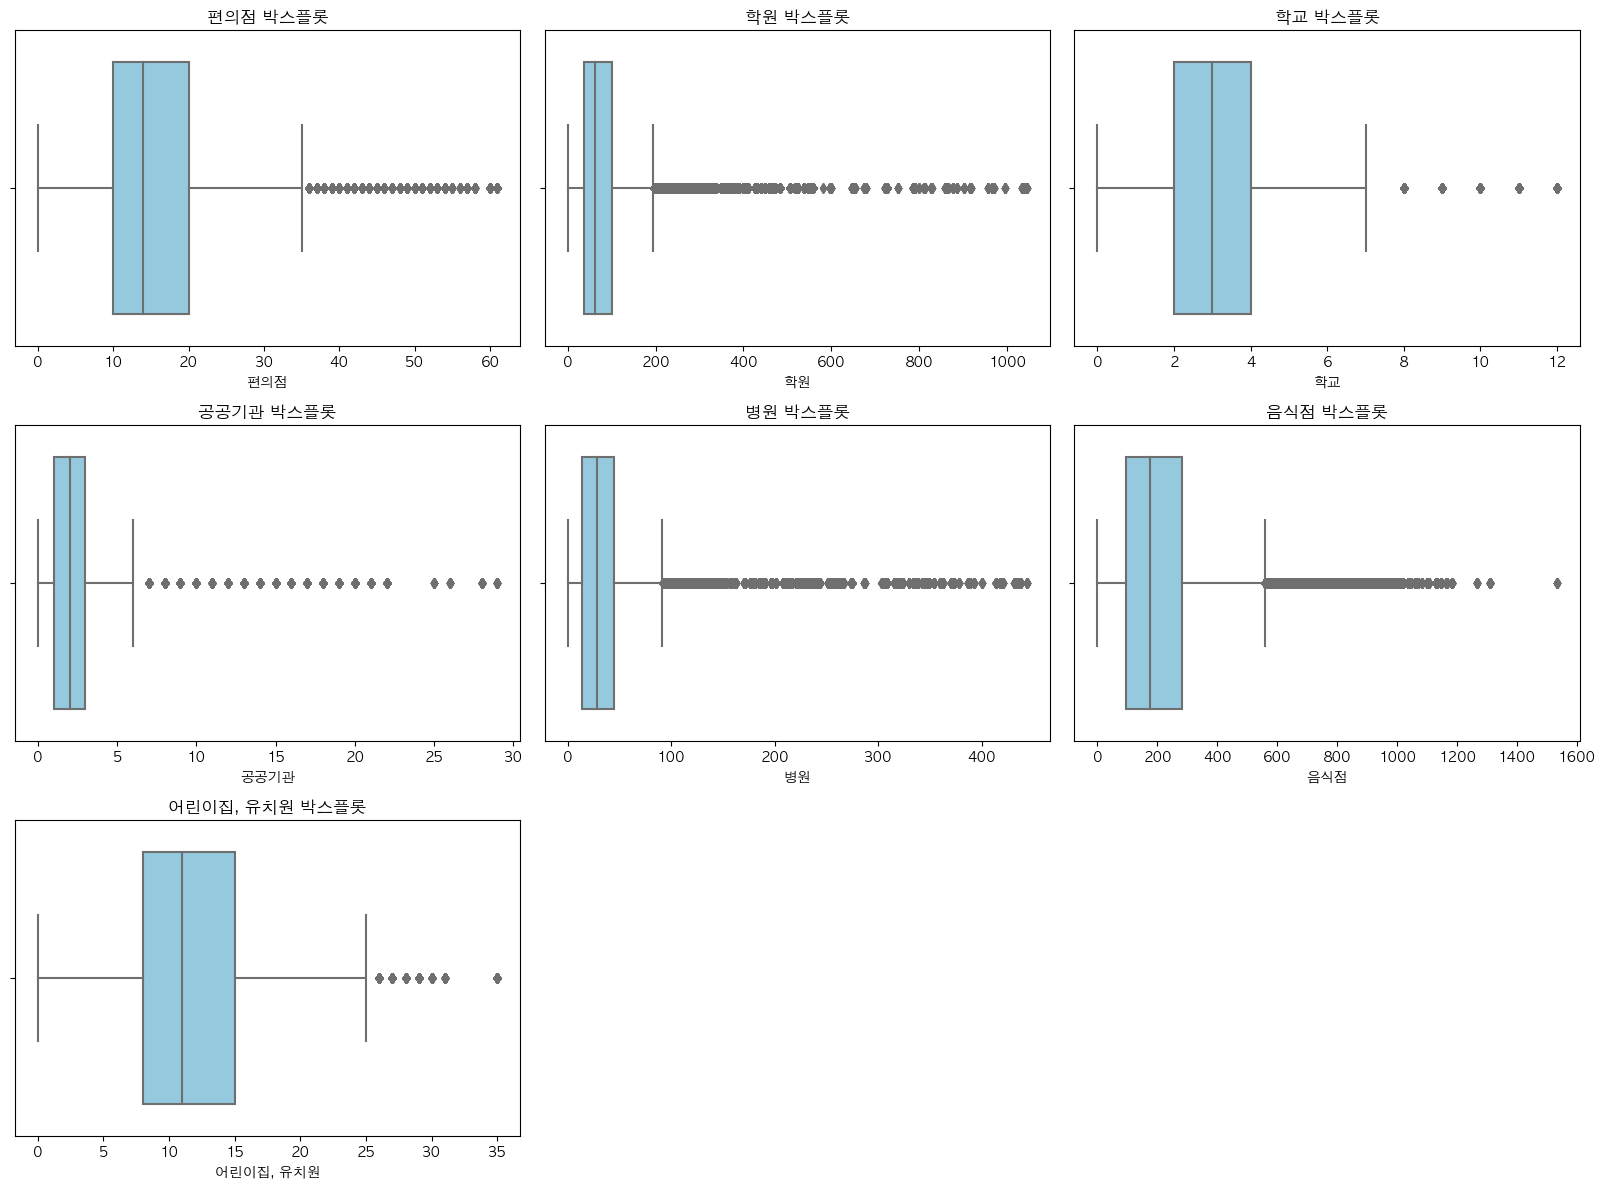

In [14]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns[:-1]):  # 'target' 제외
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'{col} 박스플롯')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


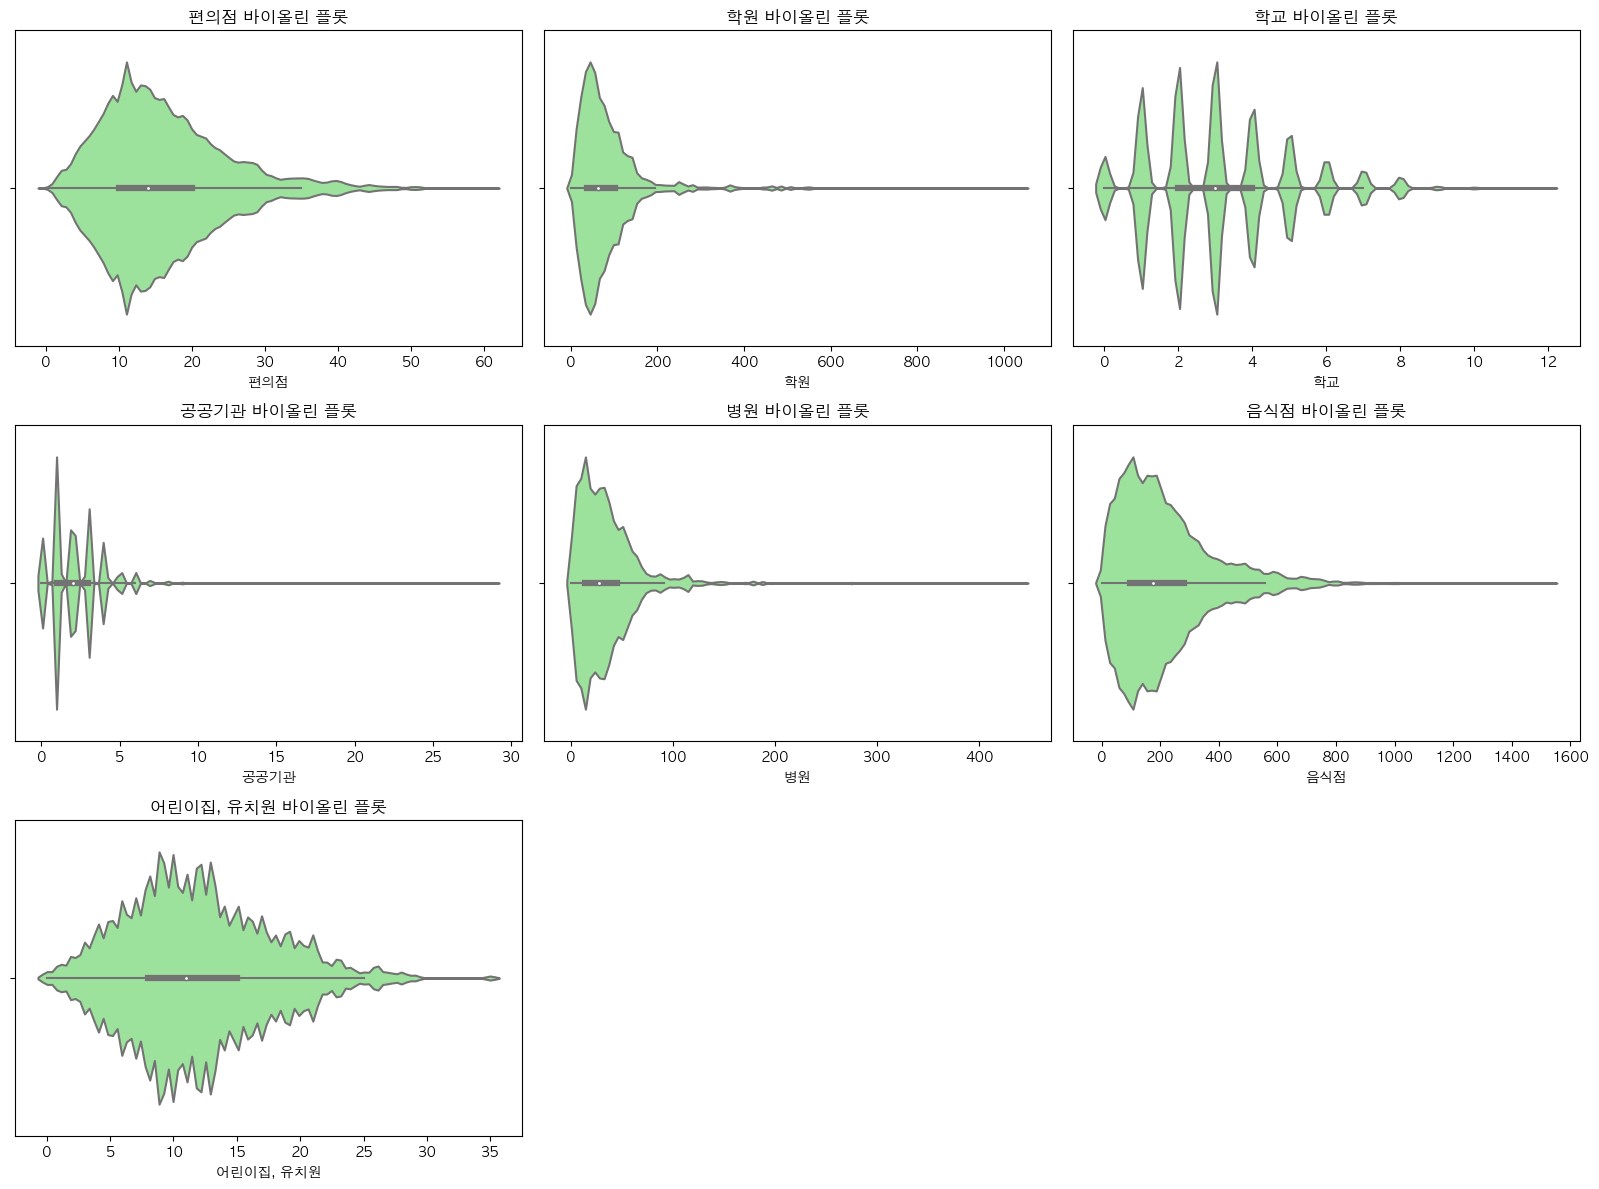

In [15]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x=data[col], color='lightgreen')
    plt.title(f'{col} 바이올린 플롯')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


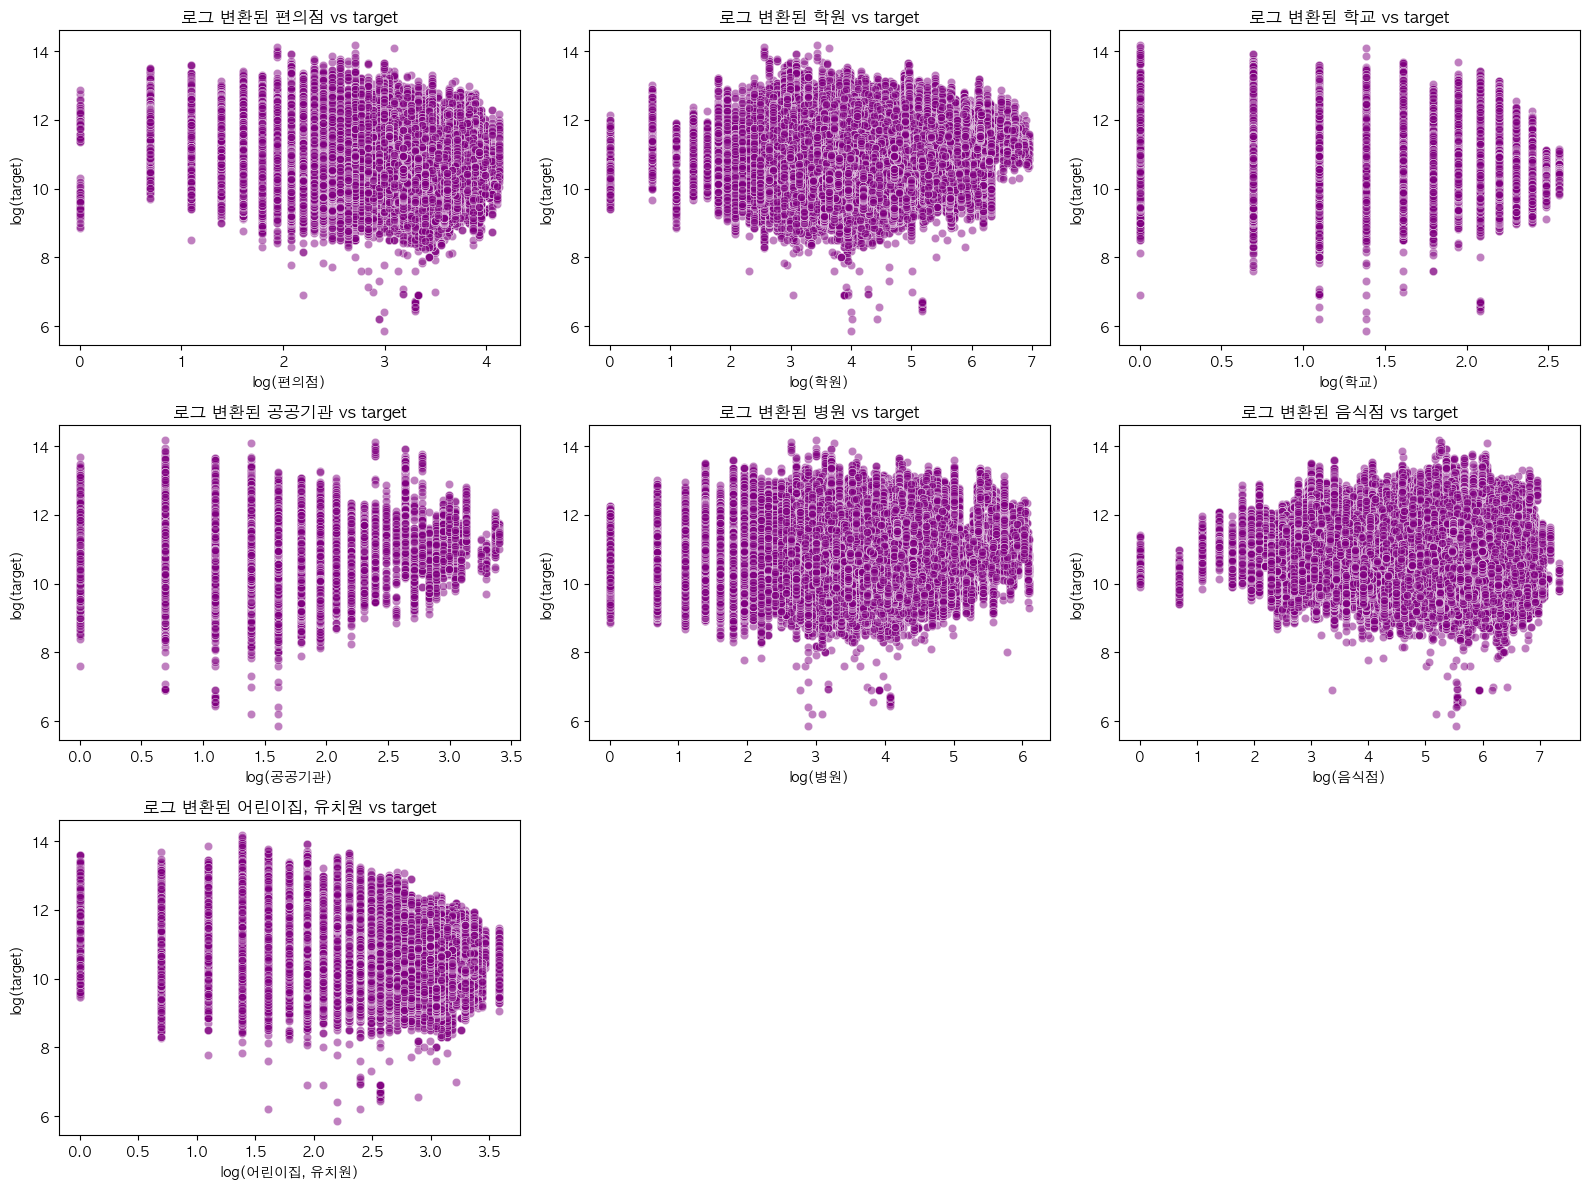

In [16]:
import numpy as np

plt.figure(figsize=(16, 12))
for i, col in enumerate(columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=np.log1p(data[col]), y=np.log1p(data['target']), alpha=0.5, color='purple')
    plt.title(f'로그 변환된 {col} vs target')
    plt.xlabel(f'log({col})')
    plt.ylabel('log(target)')

plt.tight_layout()
plt.show()



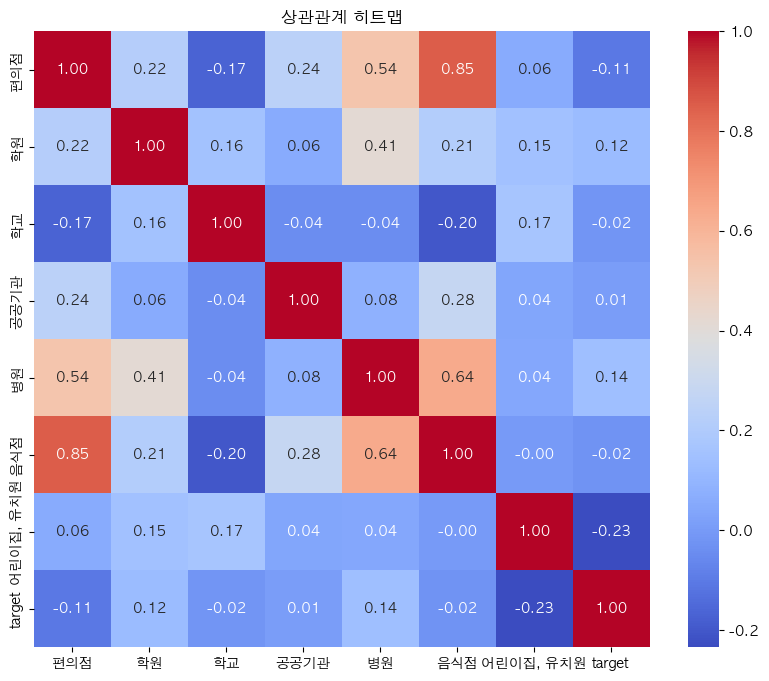

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('상관관계 히트맵')
plt.show()


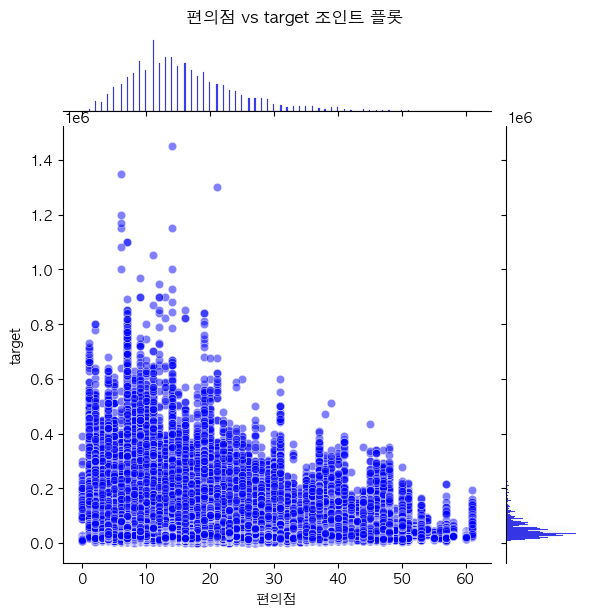

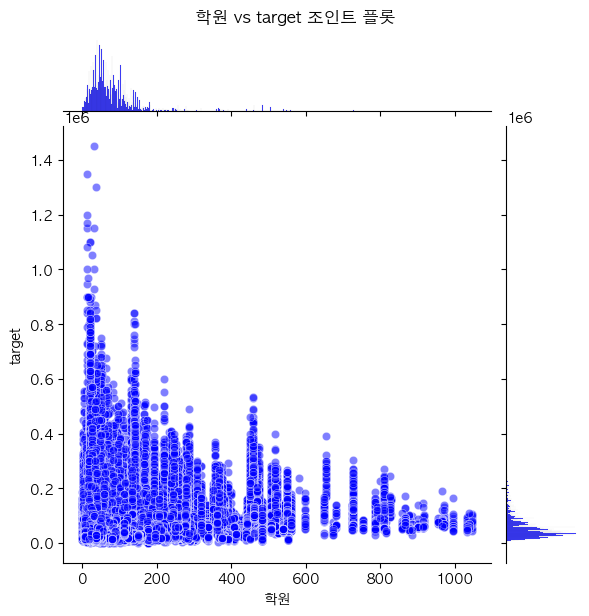

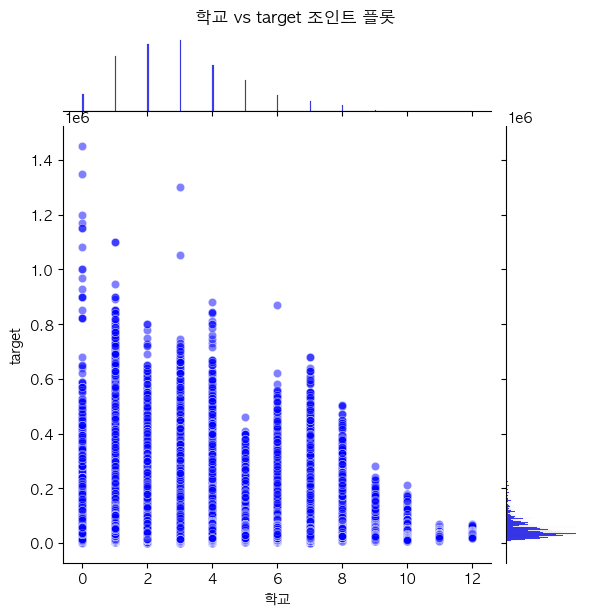

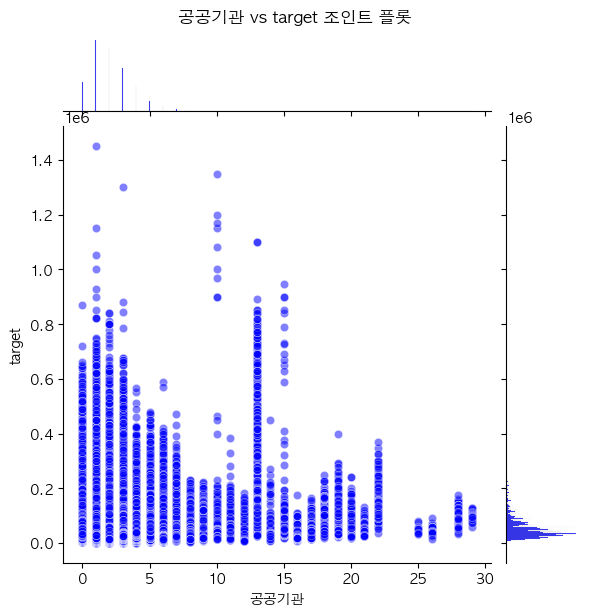

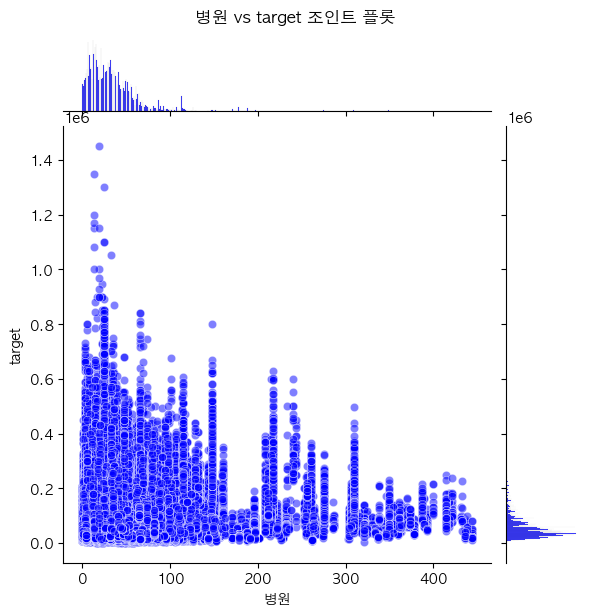

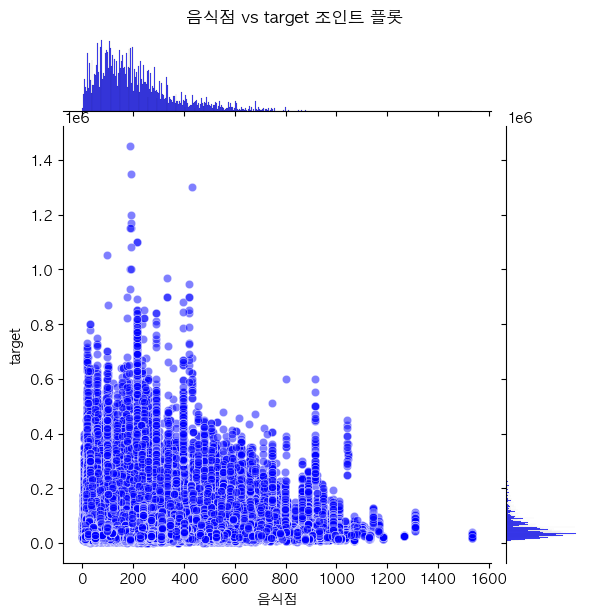

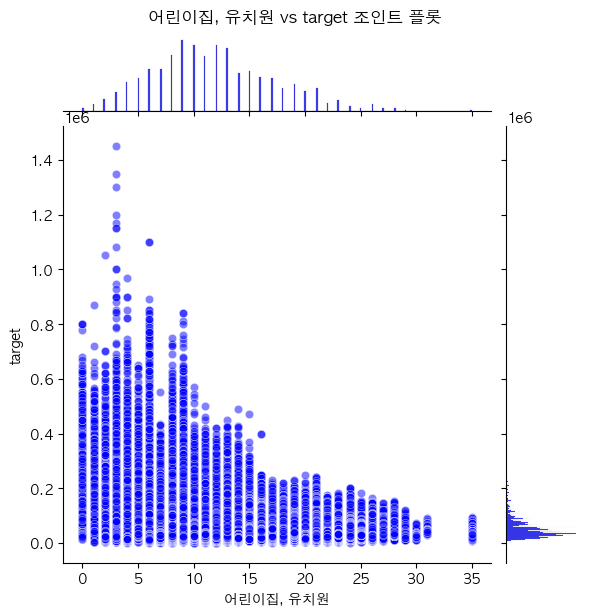

In [18]:
for col in columns[:-1]:
    sns.jointplot(x=data[col], y=data['target'], kind='scatter', height=6, alpha=0.5, color='blue')
    plt.suptitle(f'{col} vs target 조인트 플롯', y=1.02)
    plt.show()


NameError: name 'df' is not defined

In [19]:
# 분석에 사용할 변수
columns = ['편의점', '학원', '학교', '공공기관', '병원', '음식점', '어린이집, 유치원', 'target']
data2 = dt_train[columns]

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x106efc3a0>>
Traceback (most recent call last):
  File "/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


: 

: 